In [418]:
import numpy as np
import pandas as pd

In [419]:
import numpy.linalg as la
import scipy as scipy
from matplotlib import pyplot as plt 
from scipy import signal
from sklearn.decomposition import fastica
from itertools import permutations, product
from oct2py import octave

In [420]:
octave.addpath('~/Documents/Github/Honors-Thesis/fastica');

In [421]:
#Thank you so much ninjagecko for this pretty method
#to solve all of my problems
def plusAndMinusPermutations(items):
    for p in permutations(items):
        for signs in product([-1,1], repeat=len(items)):
            yield [a*sign for a,sign in zip(p,signs)]

In [422]:
def Frobenius_Norm(A, A_):
    return np.sqrt(np.trace(np.subtract(A, A_)@np.subtract(A,A_).conj().T))

In [423]:
def Get_Min(A,A_):
    i = np.eye(A.shape[0])
    perm = list(plusAndMinusPermutations(i))
    min = Frobenius_Norm(A, A_)
    for j in perm:
        j = np.array(j)
        j[j == -0] = 0
        #rint(j)
        mat = A@np.array(j)
        #rint("Mat: \n", mat, "\n")
        #rint("\nAnswer: ", A_)
        temp = Frobenius_Norm(mat, A_)
        #rint("Temp: ", temp)
        #rint("\n Min: ", min)
        if(temp < min):
            min = temp
    
    return min

In [424]:
def normalize_cols(A):
    norms = la.norm(A,axis=0)
    return A / np.tile(norms,(2,1))

In [425]:
def Error(X):
    A_EST = np.array(octave.o2pfastica(X))
    print(A_EST)
    return Get_Min(A_EST, A)

In [426]:
BallWalk = pd.read_csv('ball.csv', delimiter=',')
BallWalk = BallWalk.to_numpy()
BallWalk = BallWalk[:,1:]

Billiard = pd.read_csv('bill.csv', delimiter=',')
Billiard = Billiard.to_numpy()
Billiard = Billiard[:,1:]

HitRun = pd.read_csv('hr.csv', delimiter=',')
HitRun = HitRun.to_numpy()
HitRun = HitRun[:,1:]

In [427]:
BallWalk.shape

(2, 30000)

[[ 3.24690685 -5.34654372 -6.18171729 ... -5.31229703  6.84890705
  -6.37787025]
 [-1.43396812 -6.28043455 -6.68970281 ... -5.31308969  4.39372028
  -6.80090262]]


(array([ 853., 2423., 3654., 3968., 3866., 4005., 4004., 3693., 2627.,
         907.]),
 array([-8.9597338 , -7.17238328, -5.38503276, -3.59768224, -1.81033171,
        -0.02298119,  1.76436933,  3.55171985,  5.33907037,  7.12642089,
         8.91377142]),
 <a list of 10 Patch objects>)

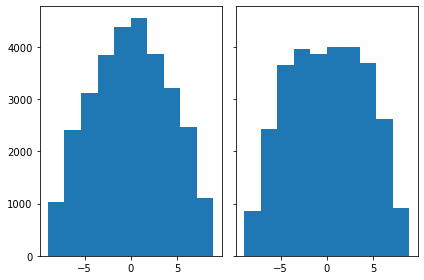

In [428]:
n_bins = 10

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
print(BallWalk)
axs[0].hist(BallWalk[0,:], bins=n_bins)
axs[1].hist(BallWalk[1,:], bins=n_bins)

(array([ 875., 2492., 3663., 3903., 4021., 3930., 3977., 3689., 2541.,
         909.]),
 array([-8.99081491, -7.20157776, -5.41234061, -3.62310346, -1.83386631,
        -0.04462916,  1.74460798,  3.53384513,  5.32308228,  7.11231943,
         8.90155658]),
 <a list of 10 Patch objects>)

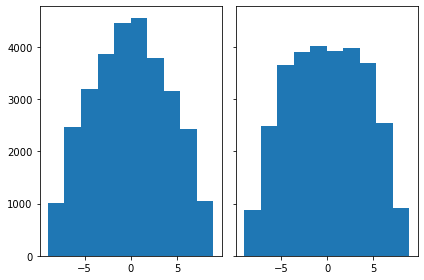

In [429]:
n_bins = 10

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(Billiard[0,:], bins=n_bins)
axs[1].hist(Billiard[1,:], bins=n_bins)

(array([ 924., 2489., 3717., 3893., 3924., 3956., 4114., 3731., 2390.,
         862.]),
 array([-8.92272075, -7.13184665, -5.34097256, -3.55009846, -1.75922437,
         0.03164973,  1.82252382,  3.61339792,  5.40427201,  7.19514611,
         8.9860202 ]),
 <a list of 10 Patch objects>)

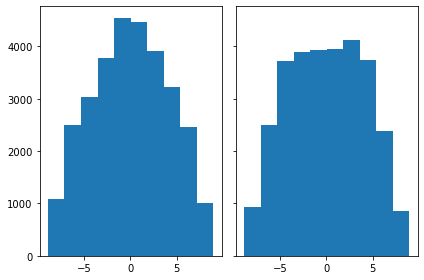

In [430]:
n_bins = 10

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(HitRun[0,:], bins=n_bins)
axs[1].hist(HitRun[1,:], bins=n_bins)

[[0.54207828 0.74777885 0.85243094 ... 0.17975945 0.20356095 0.1743673 ]
 [0.64877822 0.18668947 0.13971788 ... 0.08192888 0.24495558 0.70826841]]


(array([69., 70., 76., 68., 75., 64., 70., 76., 63., 66., 67., 54., 57.,
        60., 65.]),
 array([2.37525380e-04, 6.68733008e-02, 1.33509076e-01, 2.00144852e-01,
        2.66780627e-01, 3.33416402e-01, 4.00052178e-01, 4.66687953e-01,
        5.33323728e-01, 5.99959504e-01, 6.66595279e-01, 7.33231055e-01,
        7.99866830e-01, 8.66502605e-01, 9.33138381e-01, 9.99774156e-01]),
 <a list of 15 Patch objects>)

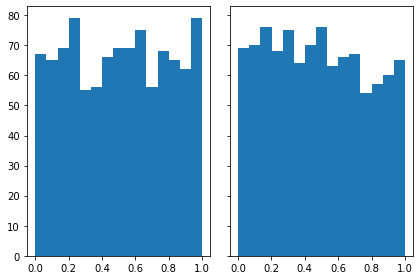

In [432]:
n_bins = 15
U = np.random.uniform(0,1,(2,1000))
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
print(U)
axs[0].hist(U[0,:], bins=n_bins)
axs[1].hist(U[1,:], bins=n_bins)

In [446]:
A = np.random.normal(0, 1, (2,2))
normalize_cols(A)
print(A)


X = A@Billiard

E = Error(X)
print(E)


[[ 0.21002132  0.08386258]
 [-0.85264364 -0.9155209 ]]
[[ 0.14395364  0.19594542]
 [-0.98958443 -0.9806148 ]]
0.16022200785876914


In [447]:
X = A@BallWalk

E = Error(X)
print(E)

[[-0.19601628 -0.14396594]
 [ 0.98060064  0.98958264]]
0.16020827371093357


In [448]:
X = A@HitRun

E = Error(X)
print(E)

[[ 0.14454232  0.19662154]
 [-0.98949862 -0.98047946]]
0.1602382110152153


In [449]:
U = np.random.uniform(0,1,(2,100000))
X = A@U

E = Error(X)
print(E)

[[-0.23903705 -0.09070293]
 [ 0.97101045  0.99587799]]
0.14613920438548847
